# Regression Using Support Vector Machine

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("cement_slump.csv")

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.shape

(103, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [6]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.038738
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.837120
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [ ]:
# No missing Values.

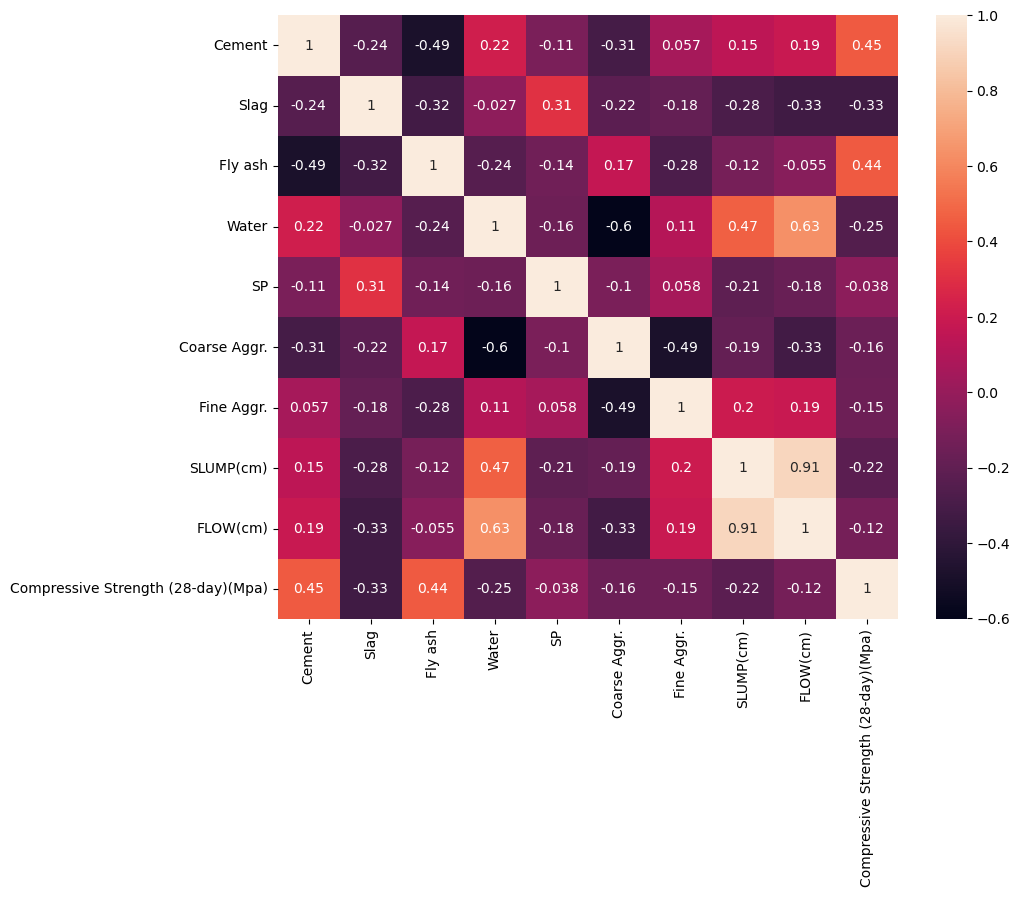

In [7]:
# Correlation Between Features and Target Variable.

plt.figure(figsize= (10,8), dpi= 100)

sns.heatmap(df.corr(), annot= True)

plt.show()

In [8]:
# "Cement" and "Fly ash" has considerable Positive Correlatio with Target.

### Train Test Split:

In [9]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [10]:
# Features:

x= df.drop('Compressive Strength (28-day)(Mpa)', axis= 1)

In [11]:
x.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0


In [12]:
# Target:

y = df['Compressive Strength (28-day)(Mpa)']

In [13]:
y.head()

0    34.99
1    41.14
2    41.81
3    42.08
4    26.82
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(82, 9)
(21, 9)
(82,)
(21,)


### Scalling:

In [16]:
sc = StandardScaler()

In [17]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,0.997420,-1.297210,-0.035970,1.055528,0.499793,0.268550,-0.949186,0.706785,0.764070
1,-1.040961,1.657774,-1.649362,-0.656558,0.843322,0.951727,0.289249,-1.960431,-1.591123
2,1.136688,0.787695,0.213992,0.713111,-0.874324,-1.906231,-0.257592,-1.738163,-1.591123
3,0.858152,0.459364,-1.649362,-0.509808,-0.874324,-0.107198,1.222097,-1.627029,-1.591123
4,0.228913,0.360864,1.067272,-1.346284,-0.290324,0.749051,-1.582879,-1.960431,-1.591123


In [18]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,1.149349,-1.297210,0.213992,-0.314141,-1.217853,-0.209674,0.562670,0.706785,0.651918
1,-0.813067,-1.297210,1.304736,-0.656558,1.530380,-0.334923,1.415100,0.373383,0.315462
2,0.870813,0.459364,-1.649362,0.664194,0.499793,-0.084425,0.096246,0.817919,0.820146
3,0.718884,0.245948,-0.274570,-0.411974,0.156264,0.177459,-0.691849,0.817919,0.707994
4,-0.889032,1.099610,0.486678,0.321777,0.843322,-0.676512,-0.466679,-0.515689,-0.581755


### Model:

In [19]:
model = SVR()

In [20]:
model.fit(x_train, y_train)

SVR()

In [21]:
pred = model.predict(x_test)

In [22]:
r2_score(y_test, pred)

0.4844708298909186

In [23]:
mean_absolute_error(y_test, pred)

4.119000968703548

In [24]:
mean_squared_error(y_test, pred)

26.08434398204699

### Grid Search:

In [25]:
model = SVR()

In [26]:
param_dict = {"kernel" : ["linear","poly","rbf","sigmoid"],
             "C" : [0.01, 0.1, 1, 10, 100],
             "gamma" : ["scale", "auto"],
             "degree" : [1,2,3],
             "epsilon" : [0.01, 0.1, 0, 0.5, 1, 2]}

In [27]:
grid_model = GridSearchCV(estimator= model, param_grid= param_dict, cv= 5)

In [28]:
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3],
                         'epsilon': [0.01, 0.1, 0, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [29]:
grid_model.best_estimator_

SVR(C=100, degree=1, epsilon=0)

In [30]:
grid_model.best_params_

{'C': 100, 'degree': 1, 'epsilon': 0, 'gamma': 'scale', 'kernel': 'rbf'}

In [31]:
grid_model.best_score_

0.9171688266279888

In [32]:
pred = grid_model.predict(x_test)

In [33]:
r2_score(y_test, pred)

0.957273472792728

In [34]:
mean_absolute_error(y_test, pred)

0.9792301074685588

In [35]:
mean_squared_error(y_test, pred)

2.161843591890166